In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import SU

In [3]:
# weekly_est_cases_deaths = pd.read_csv("data/weekly_est_cases_deaths_jupyter.csv")
weekly_est_cases_deaths = pd.read_csv("data/weekly_est_cases_deaths.csv")
weekly_est_cases_deaths['date'] =  pd.to_datetime(weekly_est_cases_deaths['date'])

In [4]:
weekly_est_cases_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 24 columns):
state                       2050 non-null object
date                        2050 non-null datetime64[ns]
new_cases_jhu               2050 non-null int64
new_deaths_jhu              2050 non-null int64
Excess Lower Estimate       1948 non-null float64
Excess Higher Estimate      1948 non-null float64
mid_point_xs_deaths         1948 non-null float64
corr_new_deaths             2050 non-null float64
est_inf                     1950 non-null float64
pro_chg_est_inf             1915 non-null float64
mobile_infectious           1933 non-null float64
phi                         1933 non-null float64
population                  2050 non-null int64
est_inf_per_100k            1950 non-null float64
new_cases_per_100k          2050 non-null float64
state_id                    2050 non-null object
rho                         2050 non-null float64
weekly_exposures            2001 non-null fl

In [9]:
print(weekly_est_cases_deaths.columns)

Index(['state', 'date', 'new_cases_jhu', 'new_deaths_jhu',
       'Excess Lower Estimate', 'Excess Higher Estimate',
       'mid_point_xs_deaths', 'corr_new_deaths', 'est_inf', 'pro_chg_est_inf',
       'mobile_infectious', 'phi', 'population', 'est_inf_per_100k',
       'new_cases_per_100k', 'state_id', 'rho', 'weekly_exposures',
       'pro_chg_weekly_exposures', 'density_cor_exposure', 'psi',
       'new_results_reported', 'positive_results', 'test_positivity_rate'],
      dtype='object')


In [448]:
state1 = 'Montana'
state2 = 'Virginia'

for_plotting1 = weekly_est_cases_deaths[(weekly_est_cases_deaths['state'] == state1) & (weekly_est_cases_deaths['date'] > '2020-03-07')]
for_plotting2 = weekly_est_cases_deaths[(weekly_est_cases_deaths['state'] == state2) & (weekly_est_cases_deaths['date'] > '2020-03-07')]

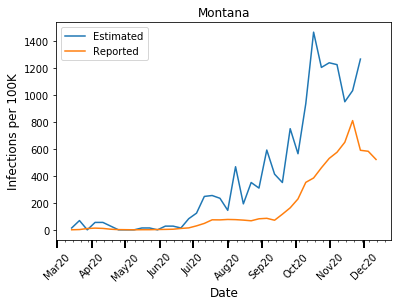

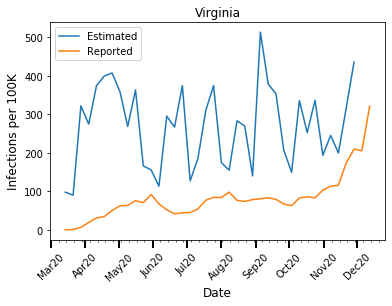

In [449]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b%y')
weeks = mdates.WeekdayLocator(byweekday=SU)

plt.plot(for_plotting1['date'], for_plotting1['est_inf_per_100k'], label='Estimated')
plt.plot(for_plotting1['date'], for_plotting1['new_cases_per_100k'], label='Reported')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_minor_locator(weeks)
X.set_major_formatter(fmt)
ax = plt.gca()
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Infections per 100K', fontsize=12)
plt.legend(loc='upper left')
plt.title(state1)
plt.show()

plt.plot(for_plotting2['date'], for_plotting2['est_inf_per_100k'], label='Estimated')
plt.plot(for_plotting2['date'], for_plotting2['new_cases_per_100k'], label='Reported')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_minor_locator(weeks)
X.set_major_formatter(fmt)
ax = plt.gca()
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Infections per 100K', fontsize=12)
plt.legend(loc='upper left')
plt.title(state2)
plt.show()

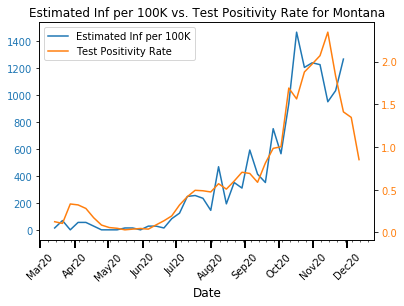

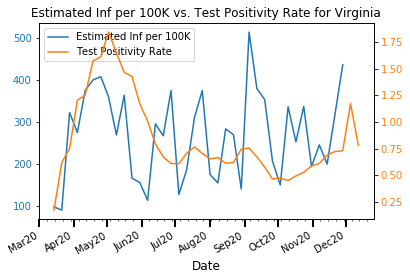

In [450]:
color1 = 'tab:blue'
color2 = 'tab:orange'

# estimated infections vs. test positivity rate for state1
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(for_plotting1['date'], for_plotting1['est_inf_per_100k'], label='Estimated Inf per 100K', color=color1)
ax2 = ax.twinx()
lns2 = ax2.plot(for_plotting1['date'], for_plotting1['test_positivity_rate'], label='Test Positivity Rate', color=color2)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

ax.set_title(f'Estimated Inf per 100K vs. Test Positivity Rate for {state1}')
ax.set_xlabel('Date', fontsize=12)
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.tick_params(axis='y', labelcolor=color1)
ax2.tick_params(axis='y', labelcolor=color2)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_minor_locator(weeks)

plt.show()



# estimated infections vs. test positivity rate for state2
fig = plt.figure()
ax = fig.add_subplot(111)

lns1 = ax.plot(for_plotting2['date'], for_plotting2['est_inf_per_100k'], label='Estimated Inf per 100K', color=color1)
ax2 = ax.twinx()
lns2 = ax2.plot(for_plotting2['date'], for_plotting2['test_positivity_rate'], label='Test Positivity Rate', color=color2)

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc='upper left')

ax.set_title(f'Estimated Inf per 100K vs. Test Positivity Rate for {state2}')
ax.set_xlabel('Date', fontsize=12)
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.tick_params(axis='y', labelcolor=color1)
ax2.tick_params(axis='y', labelcolor=color2)

ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(fmt)
ax.xaxis.set_minor_locator(weeks)
fig.autofmt_xdate()

plt.show()

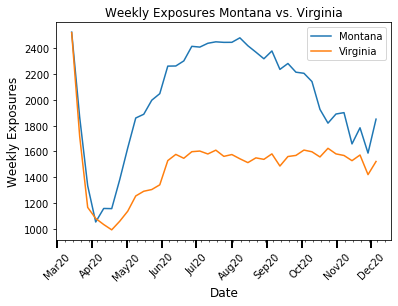

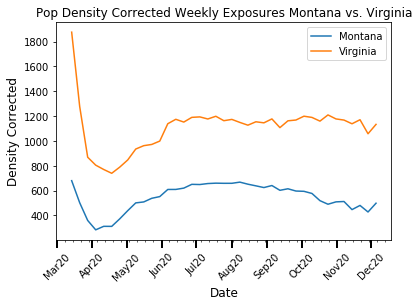

In [451]:
plt.plot(for_plotting1['date'], for_plotting1['weekly_expousres'], label=state1)
plt.plot(for_plotting2['date'], for_plotting2['weekly_expousres'], label=state2)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_minor_locator(weeks)
X.set_major_formatter(fmt)
ax = plt.gca()
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Weekly Exposures', fontsize=12)
plt.legend()
plt.title(f'Weekly Exposures {state1} vs. {state2}')
plt.show()

plt.plot(for_plotting1['date'], for_plotting1['density_cor_expousre'], label=state1)
plt.plot(for_plotting2['date'], for_plotting2['density_cor_expousre'], label=state2)
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_minor_locator(weeks)
X.set_major_formatter(fmt)
ax = plt.gca()
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Density Corrected', fontsize=12)
plt.legend()
plt.title(f'Pop Density Corrected Weekly Exposures {state1} vs. {state2}')
plt.show()

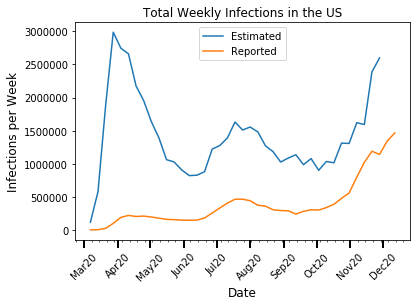

In [452]:
# Total estimated US cases vs. reported in JHU data
total_weekly_us_cases = weekly_est_cases_deaths[['est_inf','new_cases_jhu']].groupby(weekly_est_cases_deaths['date']).sum()
total_weekly_us_cases.reset_index(level=0, inplace=True)
total_weekly_us_cases.replace(0, np.nan, inplace=True)                                        
                                                 
plt.plot(total_weekly_us_cases['date'], total_weekly_us_cases['est_inf'], label='Estimated')
plt.plot(total_weekly_us_cases['date'], total_weekly_us_cases['new_cases_jhu'], label='Reported')
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_minor_locator(weeks)
X.set_major_formatter(fmt)
ax = plt.gca()
ax.tick_params(axis='x', length=8, width=2, rotation=45)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Infections per Week', fontsize=12)
plt.legend()
plt.title('Total Weekly Infections in the US')
plt.show()